In [1]:
import csv

import numpy as np
import tensorflow as tf
import glob
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
# np.genfromtxt('model/keypoint_history_classifier/data/arr_1.csv',delimiter=',')

In [3]:
model_save_path = 'model/keypoint_history_classifier/keypoint_history_classifier.hdf5'

In [4]:
data_list = glob.glob('model/keypoint_history_classifier/data/*.csv')


for i,dat in enumerate(data_list):
    if i == 0:
        data = np.genfromtxt(dat,delimiter=',')
    else:
        temp_data = np.genfromtxt(dat,delimiter=',')
        data = np.vstack((data,temp_data))
        
        
# data
X_dataset = data[:,range(1,(420)+1)]
print(X_dataset.shape)
y_dataset = data[:,0]-1

print(y_dataset)

(249, 420)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Set number of classes

In [5]:
NUM_CLASSES = 2

# Reading the Datset

In [6]:
TIME_STEPS = 10
DIMENSION = 42

# Loading the dataset

In [5]:
# X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
# y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

print(y_test)

[1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


# Builind the model

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

2021-10-02 03:43:55.350095: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()  
tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 420)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                10104     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 10,376
Trainable params: 10,376
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ',

In [10]:
# save the models 
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# compiing model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

2021-10-02 03:44:03.993319: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-02 03:44:04.008164: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000655000 Hz


Epoch 1/1000
2/2 [==============================] - 1s 534ms/step - loss: 0.8418 - accuracy: 0.4726 - val_loss: 0.7287 - val_accuracy: 0.3810

Epoch 00001: saving model to model/keypoint_history_classifier/keypoint_history_classifier.hdf5
Epoch 2/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.7541 - accuracy: 0.5655 - val_loss: 0.7033 - val_accuracy: 0.4286

Epoch 00002: saving model to model/keypoint_history_classifier/keypoint_history_classifier.hdf5
Epoch 3/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.6779 - accuracy: 0.5515 - val_loss: 0.6683 - val_accuracy: 0.5556

Epoch 00003: saving model to model/keypoint_history_classifier/keypoint_history_classifier.hdf5
Epoch 4/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.6684 - accuracy: 0.5778 - val_loss: 0.6343 - val_accuracy: 0.7460

Epoch 00004: saving model to model/keypoint_history_classifier/keypoint_history_classifier.hdf5
Epoch 5/1000
2/2 [=============================

In [13]:
# saving 
model = tf.keras.models.load_model('model/keypoint_history_classifier/keypoint_history_classifier.hdf5')

In [15]:
# predict the result
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[6.235155e-04 9.993765e-01]
1


# Confusion Matrix

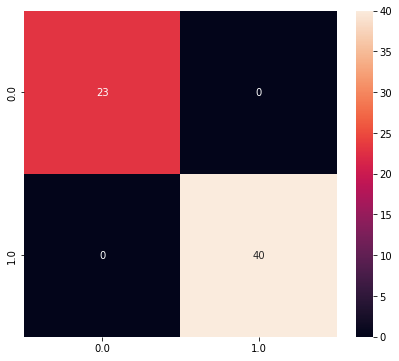

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert the model into the tensorflow

In [44]:
# convert to tflite
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [45]:
tflite_save_path = 'model/keypoint_history_classifier/keypoint_history_classifier.tflite'

In [46]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp89np69xs/assets


INFO:tensorflow:Assets written to: /tmp/tmp89np69xs/assets
2021-10-02 03:57:23.850269: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2021-10-02 03:57:23.850383: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2021-10-02 03:57:23.851404: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:928] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.002ms.
  function_optimizer: function_optimizer did nothing. time = 0.001ms.

2021-10-02 03:57:23.874152: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:316] Ignored output_format.
2021-10-02 03:57:23.874185: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:319] Ignored drop_control_dependency.
2021-10-02 03:57:23.882925: I tensorflow/lite/tools/optimize/quantize_weights.cc:22

13248

# Interpetors

In [47]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()



In [48]:
# get the input details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 420], dtype=int32), 'shape_signature': array([ -1, 420], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [49]:
print(tflite_save_path)

model/keypoint_history_classifier/keypoint_history_classifier.tflite


In [50]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

ValueError: Cannot set tensor: Got value of type NOTYPE but expected type FLOAT32 for input 0, name: input_1 

In [23]:
%%time
# call the interpetor
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 612 µs, sys: 94 µs, total: 706 µs
Wall time: 509 µs


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0. 1.]
1


In [39]:
print(model_save_path)
print(tflite_save_path)



convertor = tf.lite.TFLiteConverter.from_keras_model(model_save_path)

tflite_model = converter.convert()

with open(tflite_save_path,'wb') as f:
    f.write(tflite_model)

model/keypoint_history_classifier/keypoint_history_classifier.hdf5
model/keypoint_history_classifier/keypoint_history_classifier.tflite
INFO:tensorflow:Assets written to: /tmp/tmpxz3nywvo/assets


INFO:tensorflow:Assets written to: /tmp/tmpxz3nywvo/assets
2021-10-02 03:55:16.972539: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2021-10-02 03:55:16.972644: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2021-10-02 03:55:16.973648: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:928] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.001ms.
  function_optimizer: function_optimizer did nothing. time = 0ms.

2021-10-02 03:55:16.998715: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:316] Ignored output_format.
2021-10-02 03:55:16.998750: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:319] Ignored drop_control_dependency.
2021-10-02 03:55:17.007685: I tensorflow/lite/tools/optimize/quantize_weights.cc:222] S